###  Experiment 5.2: Sequence Text Prediction using LSTM


###  Objective  
To generate next characters/words based on a given input sequence using LSTM (Long Short-Term Memory) neural networks.


###  Dataset Used  
**Dataset:** Shakespeare’s Text from TensorFlow Datasets  
Other Suggested Datasets:
- Pride and Prejudice – Jane Austen (Project Gutenberg)  
- Harry Potter Books Dataset  
- Movie Dialogue Dataset (Cornell)  
- Reddit Jokes Dataset  
- Lyrics Dataset (e.g., Taylor Swift or Beatles)  
- Wikipedia Articles Dump  
- News Headline Dataset  
- Quora Questions Pairs  
- English Proverbs Dataset  


###  Expected Outcome  
- Auto-generated text samples based on a seed input  
- Accuracy and loss plots showing model training performance  


# News Headline Dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)
plt.style.use("ggplot")

import tensorflow as tf
print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.18.0


In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

import tensorflow.keras.utils as ku
import numpy as np

In [4]:
df = pd.read_csv("/content/News_Headline.csv", encoding='latin-1')  # or 'cp1252', 'ISO-8859-1', etc.
df.head(30)

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...
5,Rahat Fateh Ali Khan denies getting notice for...,Pakistani singer Rahat Fateh Ali Khan has deni...
6,"India get all out for 92, their lowest ODI tot...",India recorded their lowest ODI total in New Z...
7,Govt directs Alok Verma to join work 1 day bef...,Weeks after ex-CBI Director Alok Verma told th...
8,Called PM Modi 'sir' 10 times to satisfy his e...,Andhra Pradesh CM N Chandrababu Naidu has said...
9,"Cong wins Ramgarh bypoll in Rajasthan, takes t...",Congress candidate Shafia Zubair won the Ramga...


In [5]:
df['text'][0]

"Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers."

In [6]:
df['headlines'][0]

'upGrad learner switches to career in ML & Al with 90% salary hike'

In [7]:
df['text'][120]

'Deepika Padukone has taken over as chairperson of Mumbai Academy of Moving Image (MAMI), replacing filmmaker Kiran Rao, who served as chairperson for four years. "I believe in MAMI?\x9b????s vision and we are committed towards creating a community that cinema lovers and creators...truly deserve,?\x9b???\x9d Deepika said. Kiran Rao reportedly stepped down as chairperson to focus on a film project.'

In [8]:
df['headlines'][120]

'Deepika Padukone replaces Kiran Rao as chairperson of MAMI'

In [9]:
headlines=[]

In [10]:
for i in df['headlines']:
    headlines.append(i)

In [11]:
# headlines
len(headlines)

199

# As the dataset is very large we will take only first 500 headlines..

# Tokenizing the Text  -->

In [12]:
tokenizer=Tokenizer(num_words=10000)
tokenizer.fit_on_texts(headlines[:500])
total_words=len(tokenizer.word_index)+1
total_words

1237

In [14]:
sequences=[]

In [13]:
# headlines[:500]

In [15]:
len(headlines)

199

In [16]:
for l in headlines[:5000]:
     token = tokenizer.texts_to_sequences([l])[0]
#      print(token)
     for i in range(1,len(token)):
       ngrams_seq=token[:i+1]
       sequences.append(ngrams_seq)

# So we had know converted the texts to sequences..

In [17]:
# sequences
len(sequences)

1862

In [18]:
maxl=0

In [19]:
for i in sequences:
    k=len(i)
    if k>maxl:
        maxl=k

In [20]:
maxl

15

# So the maximum length among the sequrnces is 16,so this will be our max-padding..

In [21]:
data= pad_sequences(sequences, maxlen=maxl)
data

array([[   0,    0,    0, ...,    0,  298,  299],
       [   0,    0,    0, ...,  298,  299,  300],
       [   0,    0,    0, ...,  299,  300,    1],
       ...,
       [   0,    0,    0, ..., 1233, 1234,  196],
       [   0,    0,    0, ..., 1234,  196, 1235],
       [   0,    0,    0, ...,  196, 1235, 1236]], dtype=int32)

In [22]:
data.shape

(1862, 15)

# SPLITTING PREDICTORS AND LABELS  -->
Taking the last word of every sequence as target variable and rest all as the independent variables..So that our neural network will learn accordingly.. So in labels we will be selecting the last column..

In [23]:
predictors=data[:,:-1]
predictors

array([[   0,    0,    0, ...,    0,    0,  298],
       [   0,    0,    0, ...,    0,  298,  299],
       [   0,    0,    0, ...,  298,  299,  300],
       ...,
       [   0,    0,    0, ...,   38, 1233, 1234],
       [   0,    0,    0, ..., 1233, 1234,  196],
       [   0,    0,    0, ..., 1234,  196, 1235]], dtype=int32)

In [24]:
predictors.shape

(1862, 14)

# Selecting the Last Column  -->

In [25]:
labels=data[:,-1]
labels

array([ 299,  300,    1, ...,  196, 1235, 1236], dtype=int32)

In [26]:
labels.shape

(1862,)

In [27]:
labels=ku.to_categorical(labels,num_classes=total_words)
labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [28]:
labels.shape

(1862, 1237)

In [29]:
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=80, input_shape=(15,)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=90, return_sequences=False)))
model.add(Dense(total_words, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 15, 80)         │        98,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 80)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 180)            │       123,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1237)           │       223,897 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 445,977 (1.70 MB)

 Trainable params: 445,977 (1.70 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = model.fit(predictors, labels, epochs=100, verbose=1)

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.0192 - loss: 7.1029
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0377 - loss: 6.7436
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0361 - loss: 6.6210
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0421 - loss: 6.4869
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0396 - loss: 6.3281
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0539 - loss: 6.0808
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0476 - loss: 5.8919
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0596 - loss: 5.6631
Epoch 9/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0590 - loss: 5.4713
Epoch 10/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0549 - loss: 5.3529
Epoch 11/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0579 - loss: 5.1526
Epoch 12/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy:

# Accuracy & Loss

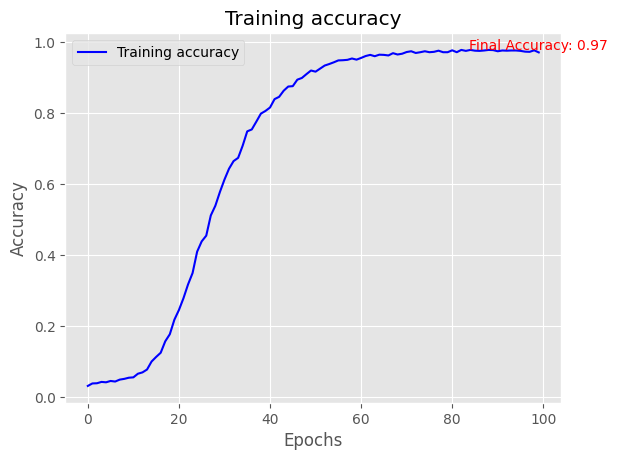

Final Accuracy: 0.97


In [33]:
accuracy = history.history['accuracy']
epochs = range(len(accuracy))

# Plot training accuracy
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.title('Training accuracy')

# Show the final accuracy value on the plot
final_accuracy = accuracy[-1]
plt.text(len(accuracy) - 1, final_accuracy, f'Final Accuracy: {final_accuracy:.2f}',
         ha='center', va='bottom', fontsize=10, color='red')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Optionally, print the final accuracy value
print(f'Final Accuracy: {final_accuracy:.2f}')

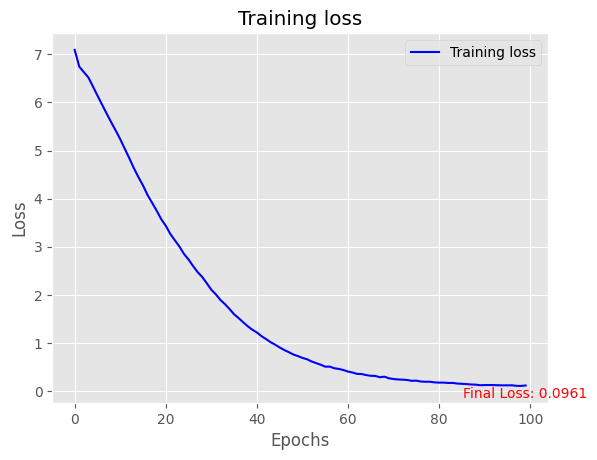

Final Loss: 0.0961


In [38]:
loss = history.history['loss']
epochs = range(len(loss))

# Plot training loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training loss')

# Show the final loss value on the plot
final_loss = 0.0961
plt.text(len(loss) - 1, final_loss, f'Final Loss: {final_loss:.4f}',
         ha='center', va='top', fontsize=10, color='red')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(f'Final Loss: {final_loss:.4f}')

# Predicting  -->

In [39]:
output_word = ""

In [42]:
test_text = "President Donald Trump"
next_words = 4

for num in range(next_words):
	token = tokenizer.texts_to_sequences([test_text])
	new_pad = pad_sequences(token, maxlen=15)
	predicted_probs = model.predict(new_pad, verbose=0) # Get prediction probabilities
	predicted = np.argmax(predicted_probs, axis=-1) # Get class with highest probability

	for word, index in tokenizer.word_index.items():
		if index == predicted[0]: # Access the predicted class
			output_word = word
			break
	test_text += " " + output_word

In [43]:
print(test_text)

President Donald Trump kg banned plastic seized


In [44]:
test_text = "Karan Johar"
next_words = 10

for num in range(next_words):
	token = tokenizer.texts_to_sequences([test_text])
	new_pad = pad_sequences(token, maxlen=15)
	predicted_probs = model.predict(new_pad, verbose=0) # Get prediction probabilities
	predicted = np.argmax(predicted_probs, axis=-1) # Get class with highest probability

	for word, index in tokenizer.word_index.items():
		if index == predicted[0]: # Access the predicted class
			output_word = word
			break
	test_text += " " + output_word

In [45]:
print(test_text)

Karan Johar tabu turn showstoppers on opening opening night of lfw sex


In [51]:
test_text = "Rahat Fateh Ali Khan"
next_words = 6

for num in range(next_words):
	token = tokenizer.texts_to_sequences([test_text])
	new_pad = pad_sequences(token, maxlen=15)
	predicted_probs = model.predict(new_pad, verbose=0) # Get prediction probabilities
	predicted = np.argmax(predicted_probs, axis=-1) # Get class with highest probability

	for word, index in tokenizer.word_index.items():
		if index == predicted[0]: # Access the predicted class
			output_word = word
			break
	test_text += " " + output_word

In [52]:
print(test_text)

Rahat Fateh Ali Khan gets notice for smuggling currency out


In [53]:
test_text = "Deepika Padukone"
next_words = 7

for num in range(next_words):
	token = tokenizer.texts_to_sequences([test_text])
	new_pad = pad_sequences(token, maxlen=15)
	predicted_probs = model.predict(new_pad, verbose=0) # Get prediction probabilities
	predicted = np.argmax(predicted_probs, axis=-1) # Get class with highest probability

	for word, index in tokenizer.word_index.items():
		if index == predicted[0]: # Access the predicted class
			output_word = word
			break
	test_text += " " + output_word

In [54]:
print(test_text)

Deepika Padukone replaces kiran rao as chairperson of mami
